# [Lab Session 3](fourier.ipynb)


In [567]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


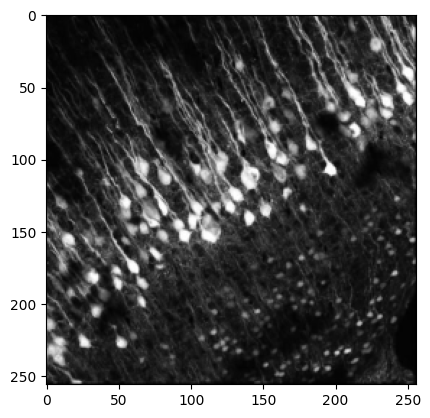

In [568]:
cell_img_512 = plt.imread('data/cells.png')


cell_img = resize(cell_img, (256, 256), anti_aliasing=True)
plt.imshow(cell_img, cmap='gray')


**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [569]:
cell_ft = np.fft.fft2(cell_img)

cell_ft.dtype


dtype('complex128')

Datentyp: komplexe Zahlen 

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [570]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

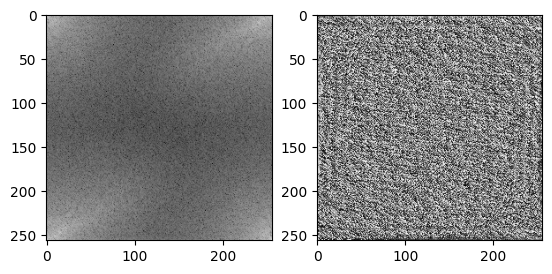

In [571]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


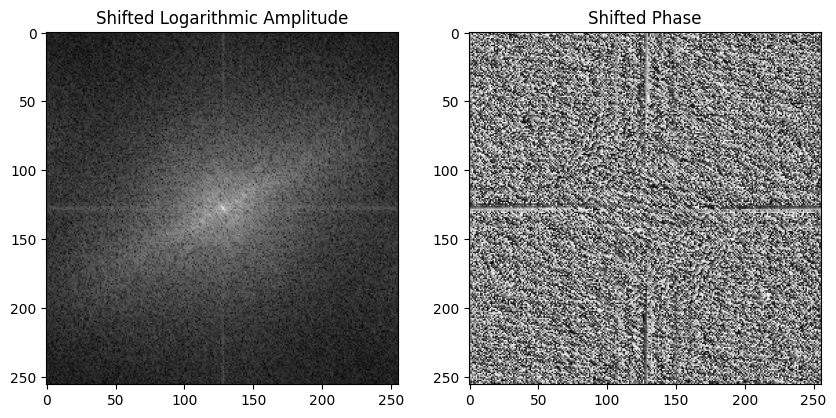

In [572]:
shifted_cell_ft = np.fft.fftshift(cell_ft)

shifted_cell_amplitude = np.abs(shifted_cell_ft)
shifted_cell_phase = np.angle(shifted_cell_ft)

# Anzeigen der verschobenen Amplitude und Phase
plt.figure(figsize=(10, 5))

# Amplitude anzeigen (logarithmisch)
plt.subplot(1, 2, 1)
plt.imshow(np.log(shifted_cell_amplitude + 1), cmap='gray') # +1 um log(0) zu vermeiden
plt.title("Shifted Logarithmic Amplitude")

# Phase anzeigen
plt.subplot(1, 2, 2)
plt.imshow(shifted_cell_phase, cmap='gray')
plt.title("Shifted Phase")
plt.show()



**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


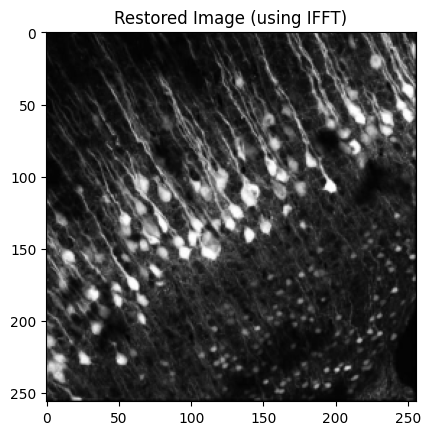

In [573]:
restored_cell_ft = np.fft.ifftshift(shifted_cell_ft)  # Zurückverschiebung des Spektrums
restored_image = np.fft.ifft2(restored_cell_ft)  # Anwenden der Inversen FFT

# Nur den realen Teil der IFFT verwenden, da das Originalbild reale Werte enthält
restored_image_real = np.real(restored_image)

# Anzeigen des wiederhergestellten Bildes
plt.imshow(restored_image_real, cmap='gray')
plt.title("Restored Image (using IFFT)")
plt.show()

---


**[Task 2 (a).]()** Load the brain MR image.


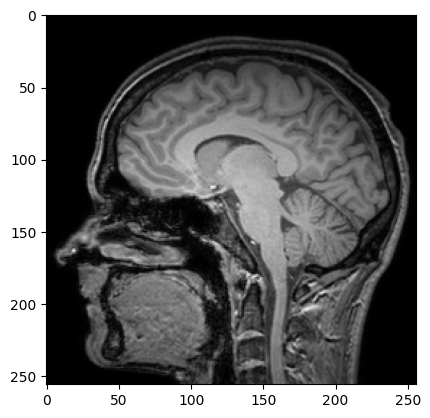

In [574]:
brain_mri = plt.imread('data/brain_mri.png')

plt.imshow(brain_mri, cmap='gray')

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


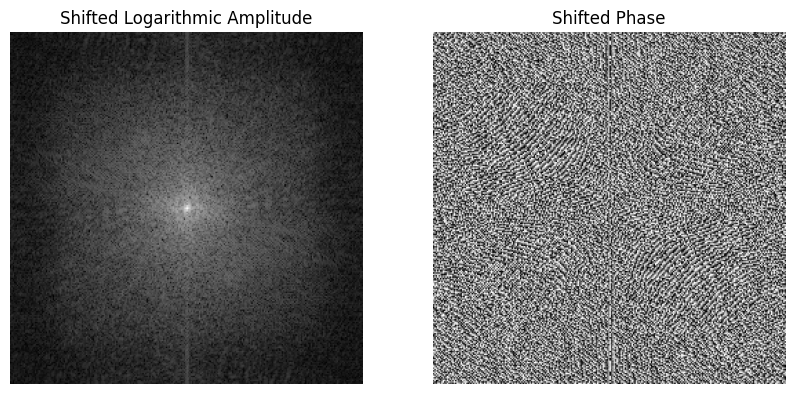

In [575]:

brain_ft = np.fft.fft2(brain_mri)
shifted_brain_ft = np.fft.fftshift(brain_ft)
shifted_brain_amplitude = np.abs(shifted_brain_ft)
shifted_brain_phase = np.angle(shifted_brain_ft)

plt.figure(figsize=(10, 5))

# Amplitude anzeigen (logarithmisch)
plt.subplot(1, 2, 1)
plt.imshow(np.log(shifted_brain_amplitude + 1), cmap='gray')
plt.title("Shifted Logarithmic Amplitude")
plt.axis('off')

# Phase anzeigen
plt.subplot(1, 2, 2)
plt.imshow(shifted_brain_phase, cmap='gray')
plt.title("Shifted Phase")
plt.axis('off')

plt.show()



In [576]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

# Aus Amplitude und Phase ein komplexes Array erstellen


**[Task 2 (c).]()** Merge the amplitude of the brain MR image and the phase of cell image. Do the IFFT and display the resulting image.


In [577]:


merged_ft_brain_amplitude_cell_phase = to_complex_array(shifted_brain_amplitude, shifted_cell_phase)
merged_ft_brain_phase_cell_amplitude = to_complex_array(shifted_cell_amplitude, shifted_brain_phase)


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


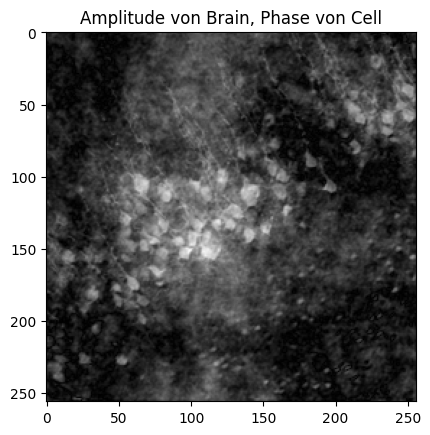

Text(0.5, 1.0, 'Phase von Brain, Phase von Cell')

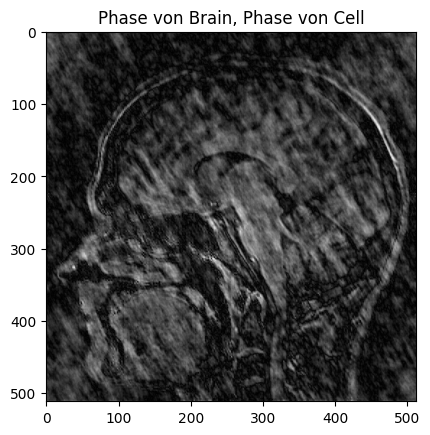

In [578]:
# Rückgängig machen des Shifts und Inverse-FFT
merged_ft_no_shift_brain_amplitude_cell_phase = np.fft.ifftshift(merged_ft_brain_amplitude_cell_phase)
restored_image_brain_amplitude_cell_phase = np.fft.ifft2(merged_ft_no_shift_brain_amplitude_cell_phase)

# Plot der wiederhergestellten Bilder
plt.imshow(np.abs(restored_image_brain_amplitude_cell_phase), cmap='gray')
plt.title("Amplitude von Brain, Phase von Cell")
plt.show()

merged_ft_no_shift_brain_phase_cell_amplitude = np.fft.ifftshift(merged_ft_brain_phase_cell_phase)
restored_image_brain_phase_cell_phase = np.fft.ifft2(merged_ft_no_shift_brain_phase_cell_phase)

# Plot der wiederhergestellten Bilder
plt.imshow(np.abs(restored_image_brain_phase_cell_phase), cmap='gray')
plt.title("Phase von Brain, Phase von Cell")



---


**[Task 3 (a).]()** Create a lowpass filter mask.


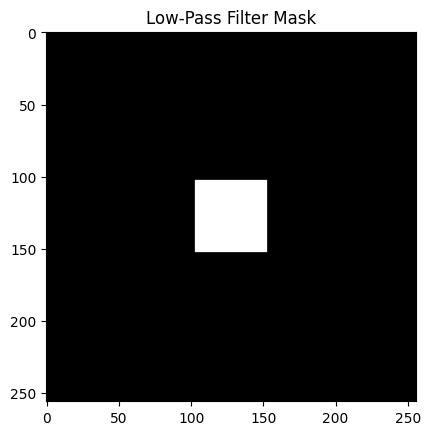

In [579]:
filter_size = 50

mask_lp = np.zeros_like(shifted_brain_amplitude)

# Definiere das Rechteck im Zentrum, das mit Einsen gefüllt wird
center_x, center_y = mask_lp.shape[0] // 2, mask_lp.shape[1] // 2
mask_lp[center_x - filter_size // 2:center_x + filter_size // 2,
        center_y - filter_size // 2:center_y + filter_size // 2] = 1

# Zeige die Low-Pass Filter-Maske an
plt.imshow(mask_lp, cmap='gray')
plt.title("Low-Pass Filter Mask")
plt.show()

#Hohe Frequenzen befinden sich in den Randbereichen des Spektrums 
#Niedrige Frequenzen befinden sich im Zentrum des Spektrums

**[Task 3 (b).]()** Create a highpass filter maks.


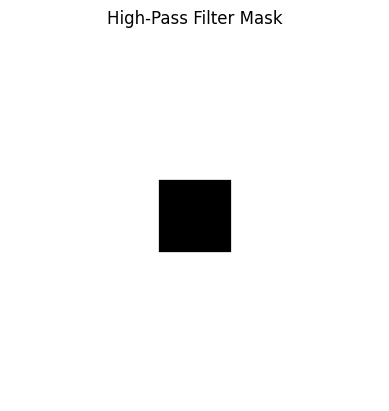

In [580]:
mask_hp = 1 - mask_lp

# Zeige die High-Pass Filter-Maske an
plt.imshow(mask_hp, cmap='gray')
plt.title("High-Pass Filter Mask")
plt.axis('off')
plt.show()

**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


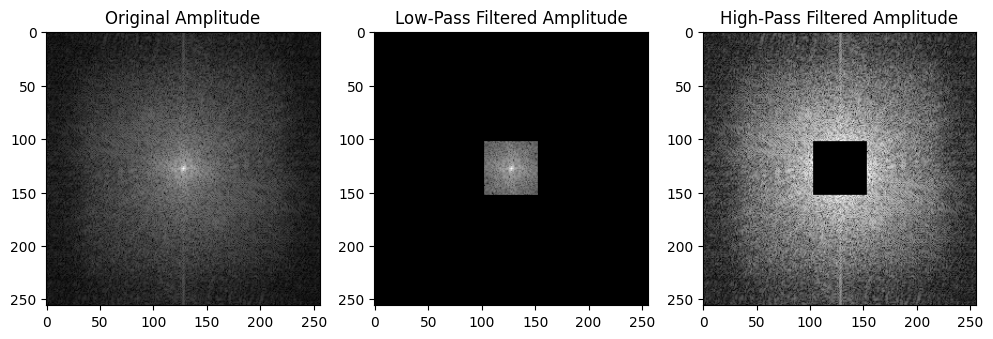

In [581]:
# Low-Pass gefilterte Amplitude
low_pass_amplitude = shifted_brain_amplitude * mask_lp

# High-Pass gefilterte Amplitude
high_pass_amplitude = shifted_brain_amplitude * mask_hp

# Anzeige der Amplituden (logarithmisch)
plt.figure(figsize=(12, 4))

# Original Amplitude (logarithmisch)
plt.subplot(1, 3, 1)
plt.imshow(np.log(shifted_brain_amplitude + 1), cmap='gray')
plt.title("Original Amplitude")


# Low-Pass gefilterte Amplitude (logarithmisch)
plt.subplot(1, 3, 2)
plt.imshow(np.log(low_pass_amplitude + 1), cmap='gray')
plt.title("Low-Pass Filtered Amplitude")


# High-Pass gefilterte Amplitude (logarithmisch)
plt.subplot(1, 3, 3)
plt.imshow(np.log(high_pass_amplitude + 1), cmap='gray')
plt.title("High-Pass Filtered Amplitude")


plt.show()

**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


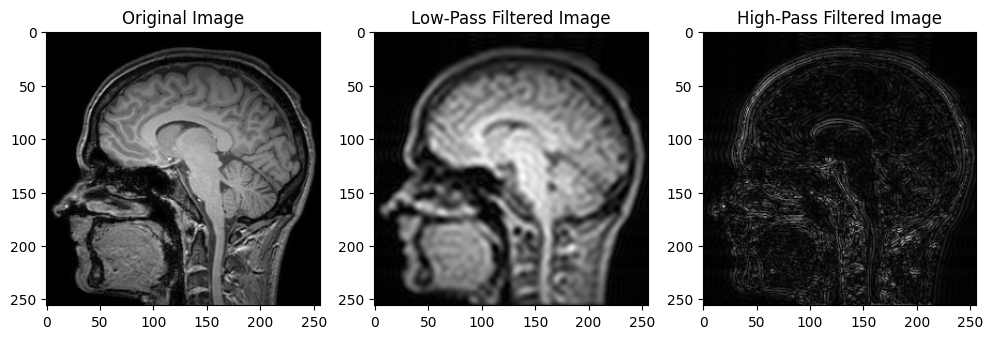

In [582]:


# Low-Pass gefiltertes Bild rekonstruieren
merged_ft_low_pass = to_complex_array(low_pass_amplitude, shifted_brain_phase)
merged_ft_no_shift_low_pass = np.fft.ifftshift(merged_ft_low_pass)
restored_image_low_pass = np.fft.ifft2(merged_ft_no_shift_low_pass)

# High-Pass gefiltertes Bild rekonstruieren
merged_ft_high_pass = to_complex_array(high_pass_amplitude, shifted_brain_phase)
merged_ft_no_shift_high_pass = np.fft.ifftshift(merged_ft_high_pass)
restored_image_high_pass = np.fft.ifft2(merged_ft_no_shift_high_pass)

# Originalbild rekonstruieren (falls benötigt)
merged_ft_original = to_complex_array(shifted_brain_amplitude, shifted_brain_phase)
merged_ft_no_shift_original = np.fft.ifftshift(merged_ft_original)
restored_image_original = np.fft.ifft2(merged_ft_no_shift_original)

# Anzeigen der rekonstruieren Bilder
plt.figure(figsize=(12, 4))

# Original Bild
plt.subplot(1, 3, 1)
plt.imshow(np.abs(restored_image_original), cmap='gray')
plt.title("Original Image")

# Low-Pass gefiltertes Bild
plt.subplot(1, 3, 2)
plt.imshow(np.abs(restored_image_low_pass), cmap='gray')
plt.title("Low-Pass Filtered Image")

# High-Pass gefiltertes Bild
plt.subplot(1, 3, 3)
plt.imshow(np.abs(restored_image_high_pass), cmap='gray')
plt.title("High-Pass Filtered Image")

plt.show()

---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


- img.shape gibt die dimensionen des Bildes zurück 
- dft ist ein leeres Array, so groß wie das img aber mit komplexen Datentyp 

In [583]:

import numpy as np

def custom_dft(img):
    M, N = img.shape  # Bildgröße
    dft = np.zeros((M, N), dtype=complex)  # DFT-Ergebnis initialisieren

    # Doppelte Schleifen über u und v (die Frequenzen)
    for u in range(M):
        for v in range(N):
            sum_val = 0 + 0j  #ist variabel in der die brechneten DFT Werte für das Frequenzpaar (u, v) gespeichert werden
            
            # Schleifen über x und y (die Bildkoordinaten), iterieren über alle Pixel im Bild
            for x in range(M):
                for y in range(N):
                    # Berechnung des Exponentialausdrucks für DFT
                    angle = -2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += img[x, y] * np.exp(angle)  # Summiere Beitrag zum DFT
            # Speichere das Ergebnis für das Frequenzpaar (u, v)
            dft[u, v] = sum_val


    return dft


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


In [584]:
def custom_idft(dft):
    M, N = dft.shape
    idft = np.zeros((M, N), dtype=complex)  # Initialize the IDFT array
    
    # IDFT calculation using the formula
    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    exponent = 2j * np.pi * ((u * x) / M + (v * y) / N)
                    sum_val += dft[x, y] * np.exp(exponent)
            idft[u, v] = sum_val
    return idft


Due to high computational costs, we need to resize the image.


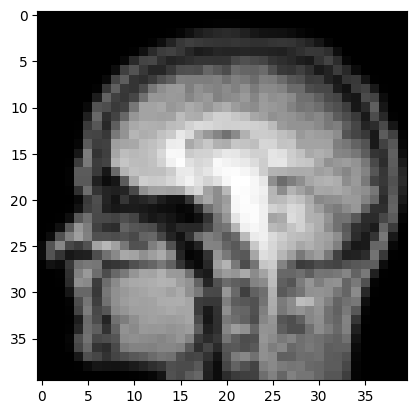

In [585]:
test_img = resize(brain_mri, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


/tmp/ipykernel_744/2437468945.py:13: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(dft_result_phase), cmap='gray')
/tmp/ipykernel_744/2437468945.py:13: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(dft_result_phase), cmap='gray')


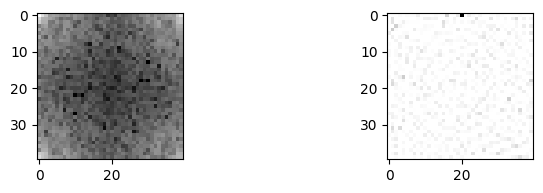

In [586]:
dft_result = custom_dft(test_img)

dft_result_amplitude = np.abs(dft_result)
dft_result_phase = np.angle(dft_result)

# Original Amplitude (logarithmisch)
plt.subplot(1, 3, 1)
plt.imshow(np.log(dft_result_amplitude), cmap='gray')


# Low-Pass gefilterte Amplitude (logarithmisch)
plt.subplot(1, 3, 3)
plt.imshow(np.log(dft_result_phase), cmap='gray')


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


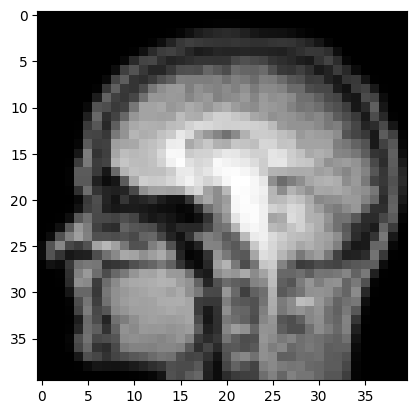

In [587]:
custom_idft_result= custom_idft(dft_result)
plt.imshow(np.abs(custom_idft_result), cmap='gray')


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


In [588]:
if brain_mri.shape != test_img.shape:
    brain_mri = resize(brain_mri, test_img.shape, anti_aliasing=True)

# Compute the 2D FFT using NumPy (die FFT wird auf das angepasste 'brain_mri' angewendet)
np_fft = np.fft.fft2(brain_mri, norm='forward')

# Deine eigene DFT-Berechnung für das 'test_img'
own_dft = custom_dft(test_img)

# Überprüfen, ob die DFT und die FFT ähnlich sind
comparison = np.allclose(own_dft, np_fft)
print(comparison)


False


**[Task 4 (f).]()** Round the arrays and compare them again.


In [589]:
# Compute mean absolute difference
mean_diff = np.mean(np.abs(own_dft - np_fft))
print(f"Mean absolute difference: {mean_diff}")

# Round the DFT and FFT results
own_dft_rounded = np.round(own_dft, 5)
np_fft_rounded = np.round(np_fft, 5)

# Check if the arrays are identical after rounding
print((own_dft_rounded == np_fft_rounded).all())


Mean absolute difference: 3.2874417642320672
False


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)


In [590]:
%timeit custom_dft(test_img)
%timeit np.fft.fft2(brain_ft, norm='forward')

4.56 s ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1 ms ± 237 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
